# Assignment

In [177]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15, train a model with regularization. Try different regularization options. Make conclusions.

In [178]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [179]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X_new = X.reshape((-1, 1))
lin_reg.fit(X_new, y)
lin_reg.intercept_, lin_reg.coef_


(np.float64(0.5366803303178729), array([-1.60931179]))

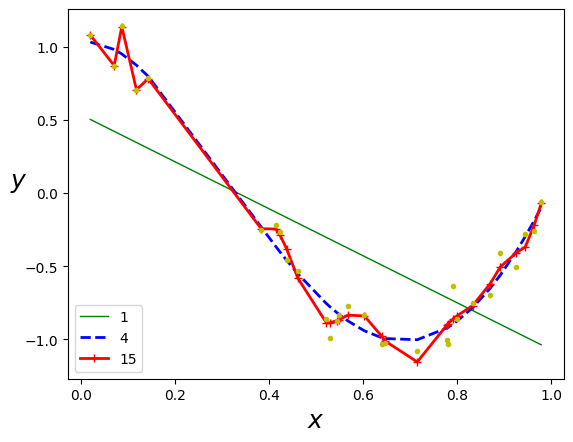

In [180]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 1), ("b--", 2, 4), ("r-+", 2, 15)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    pipeline = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_new, y)
    y_new = pipeline.predict(X_new)
    plt.plot(X, y_new, style, label=str(degree), linewidth=width)

plt.plot(X, y, "y.", linewidth=3)
plt.legend(loc="lower left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# As we see on the plot the best degree = 4 as it follows logically our points.
# Obviously degree=1 is not suitable as it is just a linear function when we have more
# complex data.
# Model with degree=15 is overfitted.

Problem 2. For this one, you shall be builduing a small full-cycle ML development pipeline.
You are provided with Boston Housing data, but you may find a dataset of your liking to use in place of the suggested one.

1. Load the Boston Housing dataset using sklearn.datasets.load_boston()
- Explore the dataset: check its shape, features, and basic statistics


2. Split the data into features (X) and target variable (y)
- Perform any necessary scaling or normalization of the features
- Split the data into training and testing sets

3. Choose at least two different regression models from scikit-learn (e.g., LinearRegression, RandomForestRegressor, Ridge, Lasso)
- Train each model on the training data

4. Make predictions on the test set using each model
- Calculate and compare the following metrics for each model:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

5. Visualize the predicted vs. actual values for each model

In [181]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data.feature_names, data.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [182]:
X, y = data.data, data.target
X.shape, y.shape

((20640, 8), (20640,))

In [183]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [184]:
X.min(axis=0), X.max(axis=0), y.min(), y.max()

(array([   0.4999    ,    1.        ,    0.84615385,    0.33333333,
           3.        ,    0.69230769,   32.54      , -124.35      ]),
 array([ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02,  3.40666667e+01,
         3.56820000e+04,  1.24333333e+03,  4.19500000e+01, -1.14310000e+02]),
 np.float64(0.14999),
 np.float64(5.00001))

In [185]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_std = poly_scaler.fit_transform(X)
X_std

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.12105299,
        -1.20640589,  1.3367148 ],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.11174328,
        -1.19837984,  1.33142656],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.11020979,
        -1.2007314 ,  1.34200435],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.62260251,
        -1.36549658,  0.80912111],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.63603469,
        -1.391599  ,  0.86077364],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.60053216,
        -1.35466953,  0.81944139]], shape=(20640, 494))

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y)

In [187]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.006, max_iter=100)
lasso.fit(X_train, y_train)
# In order to get decent values with lasso we need lower alpha and more iterations

/Users/mac/Desktop/Python_pjs/ML-2025/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.285e+02, tolerance: 2.068e+00
  model = cd_fast.enet_coordinate_descent(


,alpha,0.006
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [188]:
print("\tCoefficients:",lasso.coef_)
print("\tIntercept:",lasso.intercept_)

	Coefficients: [ 3.39518226e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -8.06534192e-02 -3.54075831e-01 -3.85643059e-01
  2.51760186e-01  9.55270721e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -2.49955860e-01  0.00000000e+00  2.14613971e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.63068707e-03
  0.00000000e+00  0.00000000e+00  7.60505745e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -7.31799644e-03 -0.00000000e+00
 -0.000000

In [189]:
print("\tCoefficients:",ridge.coef_)
print("\tIntercept:",ridge.intercept_)

	Coefficients: [-1.65830256e+00 -7.31901706e-01  5.67717076e-01  3.24559149e-02
 -1.82773494e-01 -2.05854113e-01  8.60705365e-01 -9.92678899e-01
  7.95115692e-03 -7.85708338e-01 -3.20596525e-01 -4.83277981e-01
 -4.24425143e-01 -5.18362335e-01 -1.23575230e+00  4.72335129e-01
 -7.11327611e-01  3.86191571e-02  2.74766431e-01 -4.34225552e-01
 -4.40146548e-01 -3.49165516e-01  1.31445885e-01  2.09987768e-01
 -5.56408965e-01  1.26969913e-01  3.42517641e-01  3.49076413e-01
 -1.24974035e-01 -3.57952411e-01  6.37265459e-01 -1.31303294e-01
  1.02916197e-01 -1.00703225e-01  4.86821546e-01  9.87485990e-01
 -1.64516751e-01  2.25595443e-01  6.89333635e-01  3.81423193e-01
  3.79856380e-01  6.81429652e-01  3.79533232e-01  7.41625776e-01
 -5.18031752e-01 -3.00629421e-02  5.29179296e-01  5.38180136e-01
  5.42524751e-01  9.62091304e-01 -2.03062442e-01 -4.67736139e-01
  5.87532579e-02 -5.48635213e-01 -1.28810128e-01 -6.49715326e-01
 -4.60425433e-01 -5.92316430e-01 -4.76022474e-01  2.98022950e-01
 -1.075975

In [190]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error


def get_tests(X, y, model):
    y_pred = model.predict(X)
    return {
        "mean_squared_error": mean_squared_error(y, y_pred),
        "root_mean_squared_error": root_mean_squared_error(y, y_pred)
    }


print("Ridge train:", get_tests(X_train, y_train, ridge))
print("Ridge test:", get_tests(X_test, y_test, ridge))
print("Lasso train:", get_tests(X_train, y_train, lasso))
print("Lasso test:", get_tests(X_test, y_test, lasso))

Ridge train: {'mean_squared_error': 0.36933942682815835, 'root_mean_squared_error': 0.6077330226572836}
Ridge test: {'mean_squared_error': 0.4829576172467164, 'root_mean_squared_error': 0.694951521508311}
Lasso train: {'mean_squared_error': 0.4634912706706401, 'root_mean_squared_error': 0.6808019320409131}
Lasso test: {'mean_squared_error': 0.49134164099112815, 'root_mean_squared_error': 0.7009576599132991}


In [191]:
def train_and_test(X, y, degree, alpha):
    poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
    X_std = poly_scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std, y)
    tests = {}
    for model in (Ridge(alpha), Lasso(alpha)):
        model.fit(X_train, y_train)
        tests[str(model)] = {
            "train": get_tests(X_train, y_train, model),
            "test": get_tests(X_test, y_test, model)
        }
    return tests


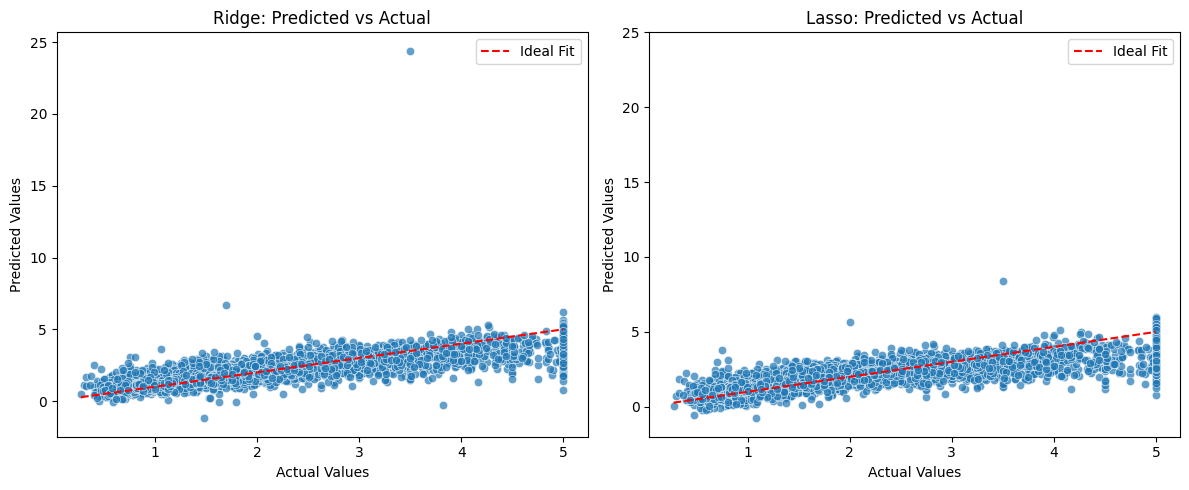

In [199]:
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred, model_name, ax):
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7, ax=ax)
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
            color="red", linestyle="--", label="Ideal Fit")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{model_name}: Predicted vs Actual")
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.ylim(-2, 25)

plot_predicted_vs_actual(y_test, ridge.predict(X_test), "Ridge", axes[0])
plot_predicted_vs_actual(y_test, lasso.predict(X_test), "Lasso", axes[1])

plt.tight_layout()
plt.show()